In [13]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
#re-size all the images to this
IMAGE_SIZE=[224,224]
 
#Train data(images) path
train_path='C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set'
 
#Test data(images) path
valid_path='C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set'

In [15]:
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in resnet50.layers:
    layer.trainable=False

In [16]:
#Getting number of classes
folders=glob('C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set/*')

In [17]:

#Our layers - you can add more layer if you want

x=Flatten()(resnet50.output)
 
#Defined the output layer

prediction=Dense(len(folders),activation='sigmoid')(x)
 

# create a model

In [18]:
model=Model(inputs=resnet50.input,outputs=prediction)
 
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')
print('='*100)
#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')

Training length:

Found 367 images belonging to 2 classes.
Test length:

Found 58 images belonging to 2 classes.


# Train the model

In [21]:
r=model.fit(training_set,
 validation_data=test_set,
 epochs=30,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set))

Epoch 1/30
12/12 [==============================] - 26s 2s/step - loss: 5.9084 - accuracy: 0.4959 - val_loss: 4.6119 - val_accuracy: 0.5000
Epoch 2/30
12/12 [==============================] - 27s 2s/step - loss: 2.3550 - accuracy: 0.4850 - val_loss: 1.3920 - val_accuracy: 0.5000
Epoch 3/30
12/12 [==============================] - 27s 2s/step - loss: 0.9472 - accuracy: 0.5695 - val_loss: 1.2193 - val_accuracy: 0.5000
Epoch 4/30
12/12 [==============================] - 33s 3s/step - loss: 0.9493 - accuracy: 0.5504 - val_loss: 0.5904 - val_accuracy: 0.6724
Epoch 5/30
12/12 [==============================] - 31s 3s/step - loss: 0.5999 - accuracy: 0.6894 - val_loss: 0.6032 - val_accuracy: 0.6379
Epoch 6/30
12/12 [==============================] - 33s 3s/step - loss: 0.6079 - accuracy: 0.6649 - val_loss: 0.6001 - val_accuracy: 0.6897
Epoch 7/30
12/12 [==============================] - 33s 3s/step - loss: 0.6178 - accuracy: 0.6649 - val_loss: 0.6934 - val_accuracy: 0.6379
Epoch 8/30
12/12 [==

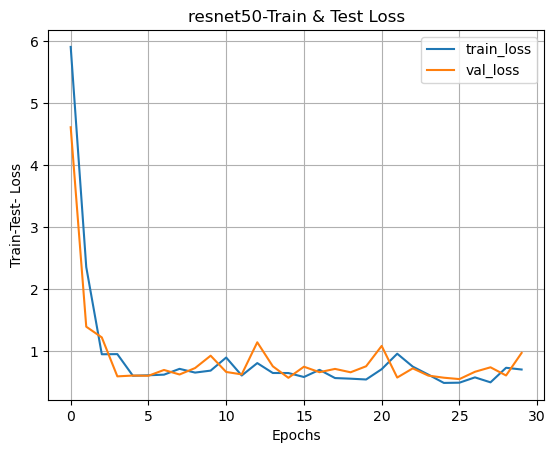

<Figure size 640x480 with 0 Axes>

In [22]:
#loss
plt.title('resnet50-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Loss & Val_loss')

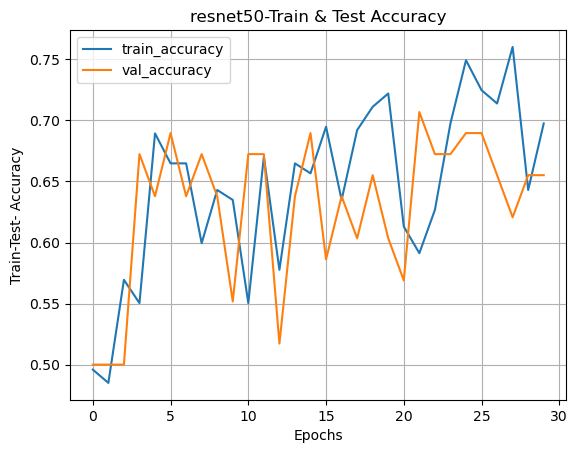

<Figure size 640x480 with 0 Axes>

In [23]:
#Accuracy
plt.title('resnet50-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Accuracy & Val_accuracy')

In [24]:
import tensorflow as tf
from keras.models import load_model
model.save('Restnet50_dog_cat_classify.h5') 

C:\Users\SIRISHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.save('Restnet50_dog_cat_classify.keras')

In [26]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [27]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))


2/2 [==============================] - 7s 2s/step
Confusion Matrix
[[25  4]
 [24  5]]
Classification Report
              precision    recall  f1-score   support

         cat       0.51      0.86      0.64        29
         dog       0.56      0.17      0.26        29

    accuracy                           0.52        58
   macro avg       0.53      0.52      0.45        58
weighted avg       0.53      0.52      0.45        58

Accuracy Score
0.5172413793103449


<Axes: >

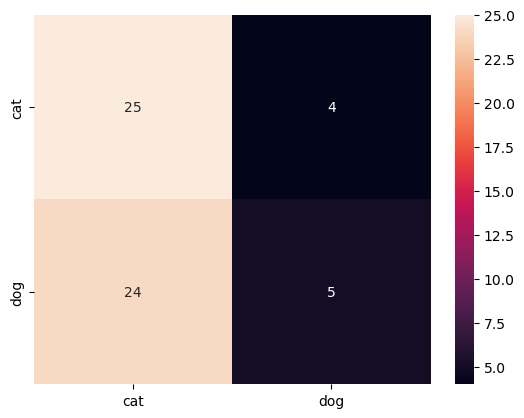

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])

# Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

In [30]:

from tensorflow.keras.applications import VGG16, VGG19
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [31]:
IMAGE_SIZE=[224,224]
 
#Train data(images) path
train_path='C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set'
 
#Test data(images) path
valid_path='C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set'

In [34]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_base.layers:
    layer.trainable = False
from tensorflow.keras.applications import VGG19

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg19_base.layers:
    layer.trainable = False


In [35]:
#Getting number of classes
folders=glob('C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set/*')

In [36]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg16_base.output)
#Defined the output layer
prediction=Dense(len(folders),activation='sigmoid')(x)

In [37]:
model=Model(inputs=vgg16_base.input,outputs=prediction)
 
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')
print('='*100)
#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')

Training length:

Found 367 images belonging to 2 classes.
Test length:

Found 58 images belonging to 2 classes.


In [40]:
r=model.fit(training_set,
 validation_data=test_set,
 epochs=30,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set))

Epoch 1/30
12/12 [==============================] - 77s 6s/step - loss: 0.7391 - accuracy: 0.6594 - val_loss: 0.3566 - val_accuracy: 0.8103
Epoch 2/30
12/12 [==============================] - 77s 6s/step - loss: 0.2967 - accuracy: 0.8774 - val_loss: 0.3354 - val_accuracy: 0.8103
Epoch 3/30
12/12 [==============================] - 77s 6s/step - loss: 0.2147 - accuracy: 0.9074 - val_loss: 0.2853 - val_accuracy: 0.8276
Epoch 4/30
12/12 [==============================] - 76s 6s/step - loss: 0.1273 - accuracy: 0.9728 - val_loss: 0.2468 - val_accuracy: 0.8966
Epoch 5/30
12/12 [==============================] - 76s 6s/step - loss: 0.1003 - accuracy: 0.9673 - val_loss: 0.2501 - val_accuracy: 0.8793
Epoch 6/30
12/12 [==============================] - 76s 6s/step - loss: 0.0806 - accuracy: 0.9837 - val_loss: 0.2446 - val_accuracy: 0.8966
Epoch 7/30
12/12 [==============================] - 75s 6s/step - loss: 0.0841 - accuracy: 0.9728 - val_loss: 0.2276 - val_accuracy: 0.8793
Epoch 8/30
12/12 [==

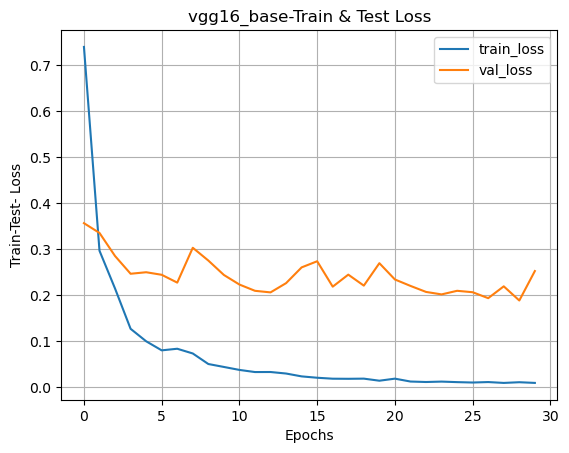

<Figure size 640x480 with 0 Axes>

In [42]:
#loss
plt.title('vgg16_base-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Loss & Val_loss')

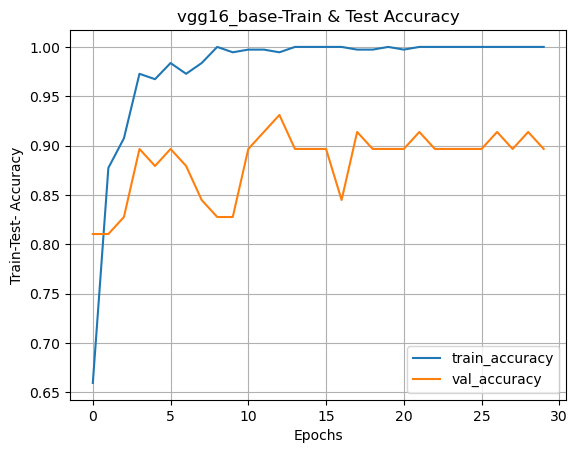

<Figure size 640x480 with 0 Axes>

In [43]:
#Accuracy
plt.title('vgg16_base-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Accuracy & Val_accuracy')

In [44]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16_base_dog_cat_classify.h5') 

C:\Users\SIRISHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model.save('vgg16_base_dog_cat_classify.keras')

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))


2/2 [==============================] - 6s 2s/step
Confusion Matrix
[[ 9 20]
 [14 15]]
Classification Report
              precision    recall  f1-score   support

         cat       0.39      0.31      0.35        29
         dog       0.43      0.52      0.47        29

    accuracy                           0.41        58
   macro avg       0.41      0.41      0.41        58
weighted avg       0.41      0.41      0.41        58

Accuracy Score
0.41379310344827586


<Axes: >

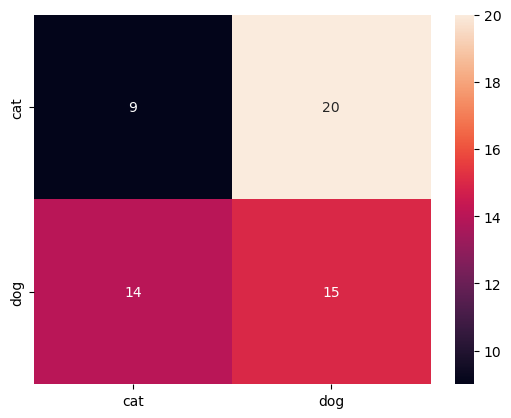

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])

# for VGG19

Found 294 images belonging to 2 classes.
Found 73 images belonging to 2 classes.
Class Names: ['cats', 'dogs']
Found 58 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26447425 (100.89 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
Epoch 1/

C:\Users\SIRISHA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 74s 8s/step - loss: 7.1209 - accuracy: 0.5305 - val_loss: 3.5180 - val_accuracy: 0.4844
Epoch 2/10
9/9 [==============================] - 70s 8s/step - loss: 4.2456 - accuracy: 0.5420 - val_loss: 2.1691 - val_accuracy: 0.4688
Epoch 3/10
9/9 [==============================] - 79s 9s/step - loss: 2.7004 - accuracy: 0.5556 - val_loss: 0.5044 - val_accuracy: 0.8281
Epoch 4/10
9/9 [==============================] - 70s 8s/step - loss: 1.1707 - accuracy: 0.6450 - val_loss: 1.2665 - val_accuracy: 0.5625
Epoch 5/10
9/9 [==============================] - 72s 8s/step - loss: 0.6519 - accuracy: 0.7023 - val_loss: 1.1194 - val_accuracy: 0.5781
Epoch 6/10
9/9 [==============================] - 73s 8s/step - loss: 0.6407 - accuracy: 0.7099 - val_loss: 0.3325 - val_accuracy: 0.8438
Epoch 7/10
9/9 [==============================] - 74s 8s/step - loss: 0.6141 - accuracy: 0.7443 - val_loss: 0.4142 - val_accuracy: 0.8750
Epoch 8/10
9/9 [=============================

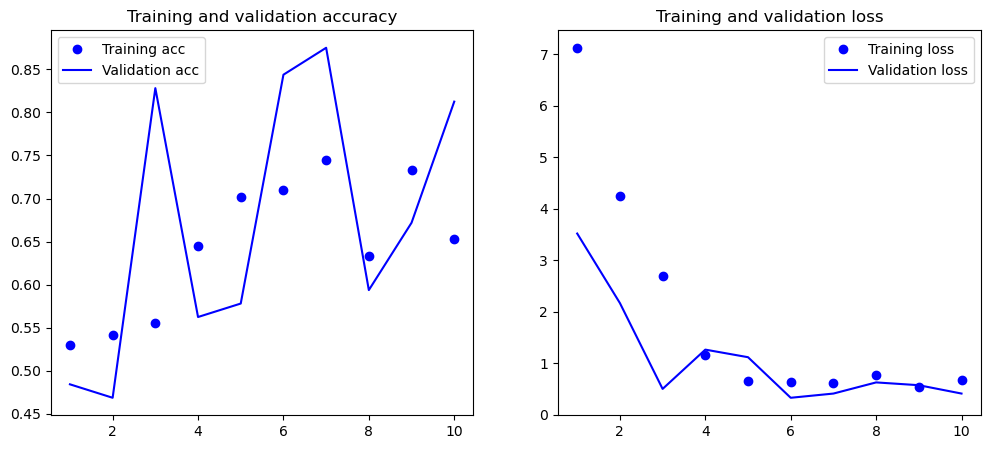

2/2 [==============================] - 12s 5s/step - loss: 0.3871 - accuracy: 0.9483
Test Accuracy: 94.83%
Test Loss: 0.3871
2/2 [==============================] - 13s 5s/step
Confusion Matrix (Test):
 [[29  0]
 [29  0]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        29
           1       0.00      0.00      0.00        29

    accuracy                           0.50        58
   macro avg       0.25      0.50      0.33        58
weighted avg       0.25      0.50      0.33        58



C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


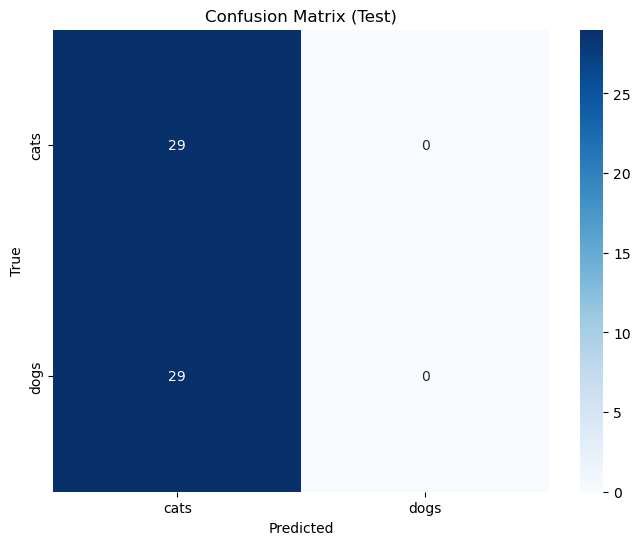

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19  # Change here
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import seaborn as sns

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Paths
train_path = 'C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set'
test_path = 'C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/test_set/test_set'

# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Create the VGG19 model  # Change here
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Change here

model_vgg19 = models.Sequential()
model_vgg19.add(base_model_vgg19)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(1, activation='sigmoid'))

# Freeze the pre-trained layers
for layer in base_model_vgg19.layers:
    layer.trainable = False

model_vgg19.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Print the model summary
model_vgg19.summary()

# Define callbacks (ModelCheckpoint)
checkpoint = ModelCheckpoint('best_model_vgg19.h5', monitor='val_accuracy', save_best_only=True)

# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)

# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_vgg19)

# Evaluate on the test set
test_loss, test_acc = model_vgg19.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Predict the classes for the test set
y_test_pred = model_vgg19.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Adjust for multiclass classification

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2.Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = 'C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set'
validation_data_dir = 'C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/test_set/test_set'

# Define ImageDataGenerator for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and target size
batch_size = 32
target_size = (224, 224)  # Assuming images are resized to (224, 224) for InceptionV3 or MobileNet

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 367 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [5]:
NUM_CLASSES = 2
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
NUM_EPOCHS = 10  # Define the number of epochs

history_inception = model.fit(train_generator, 
                              epochs=NUM_EPOCHS, 
                              validation_data=validation_generator)


Epoch 1/10
12/12 [==============================] - 39s 3s/step - loss: 0.4859 - accuracy: 0.8529 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 0.1497 - accuracy: 0.9619 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 22s 2s/step - loss: 0.2007 - accuracy: 0.9646 - val_loss: 0.0357 - val_accuracy: 0.9828
Epoch 4/10
12/12 [==============================] - 22s 2s/step - loss: 0.0306 - accuracy: 0.9864 - val_loss: 0.1307 - val_accuracy: 0.9655
Epoch 5/10
12/12 [==============================] - 22s 2s/step - loss: 0.1085 - accuracy: 0.9728 - val_loss: 0.0179 - val_accuracy: 0.9828
Epoch 6/10
12/12 [==============================] - 22s 2s/step - loss: 0.1098 - accuracy: 0.9782 - val_loss: 0.3661 - val_accuracy: 0.8793
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 0.2385 - accuracy: 0.9482 - val_loss: 9.1033e-04 - val_accuracy: 1.0000
Epoch 8/10
12/12

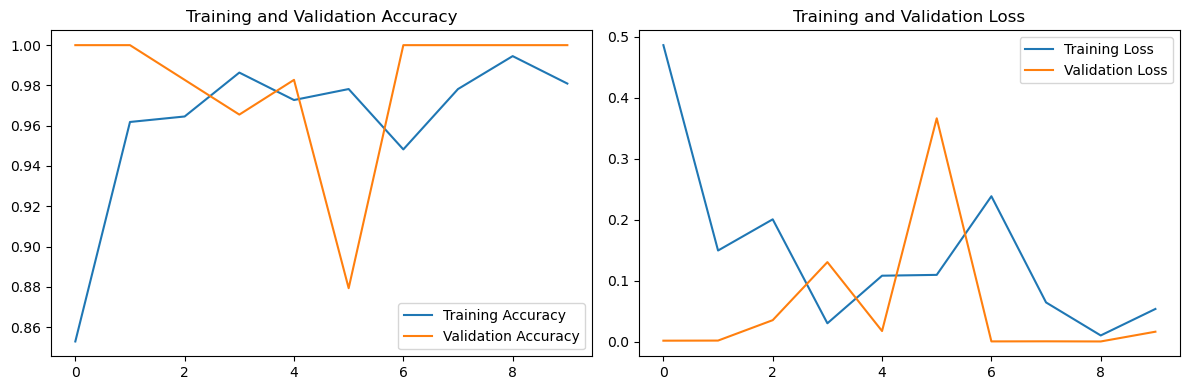

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Training Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# MobileNet

Found 367 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


Epoch 1/10
12/12 [==============================] - 18s 1s/step - loss: 0.9176 - accuracy: 0.7738 - val_loss: 0.1287 - val_accuracy: 0.9483
Epoch 2/10
12/12 [==============================] - 14s 1s/step - loss: 0.0975 - accuracy: 0.9564 - val_loss: 0.0557 - val_accuracy: 0.9828
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.0659 - accuracy: 0.9728 - val_loss: 0.0468 - val_accuracy: 0.9828
Epoch 4/10
12/12 [==============================] - 13s 1s/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.1030 - val_accuracy: 0.9655
Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0542 - val_accuracy: 0.9828
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 0.0282 - accuracy: 0.9946 - val_loss: 0.0927 - val_accuracy: 0.9655
Epoch 7/10
12/12 [==============================] - 13s 1s/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 0.9655
Epoch 8/10
12/12 [==

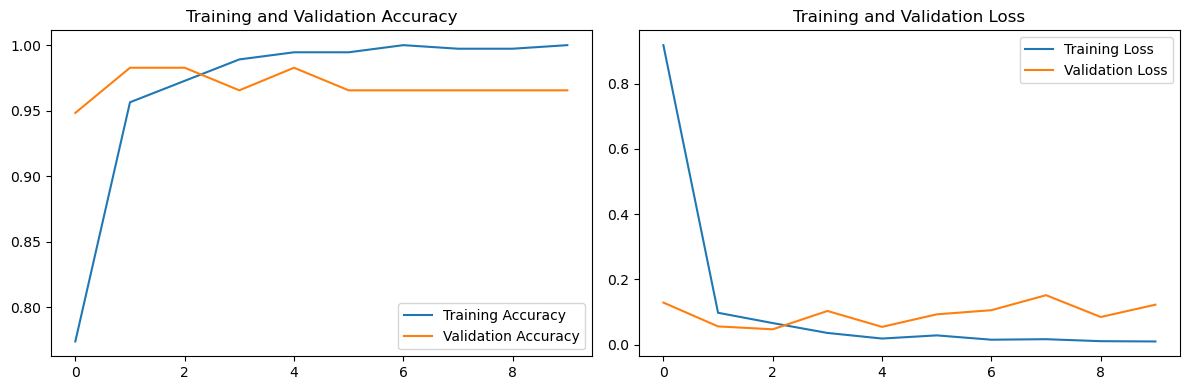

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define paths to your dataset
train_data_dir = 'C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/training_set/training_set'
validation_data_dir = 'C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set'

# Define ImageDataGenerator for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and target size
batch_size = 32
target_size = (224, 224)  # Assuming images are resized to (224, 224) for MobileNet

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

NUM_CLASSES = 2  # Update with the number of classes in your dataset

# Load MobileNet model without the top classification layers
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NUM_EPOCHS = 10  # Define the number of epochs

history_mobilenet = model.fit(train_generator, 
                              epochs=NUM_EPOCHS, 
                              validation_data=validation_generator)

# Visualization similar to the one you provided for InceptionV3
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()
